In [46]:
# Importing modules
import pandas as pd
import numpy as np

In [47]:
# Importing data files
spamData= pd.read_csv('./FinalDataset/Spam.csv')
# len(spamData)

In [48]:
# Check for null values by column wise
a = spamData.isnull().sum().to_dict()

In [49]:
# Data cleaning with replacing null values with mean-by-column
spamData['avgpathtokenlen'] = spamData['avgpathtokenlen'].fillna(spamData['avgpathtokenlen'].mean())
spamData['NumberRate_Extension'] = spamData['NumberRate_Extension'].fillna(spamData['NumberRate_Extension'].mean())
spamData['NumberRate_AfterPath'] = spamData['NumberRate_AfterPath'].fillna(spamData['NumberRate_AfterPath'].mean())
spamData['Entropy_DirectoryName'] = spamData['Entropy_DirectoryName'].fillna(spamData['Entropy_DirectoryName'].mean())
spamData['Entropy_Filename'] = spamData['Entropy_Filename'].fillna(spamData['Entropy_Filename'].mean())
spamData['Entropy_Extension'] = spamData['Entropy_Extension'].fillna(spamData['Entropy_Extension'].mean())
spamData['Entropy_Afterpath'] = spamData['Entropy_Afterpath'].fillna(spamData['Entropy_Afterpath'].mean())

In [50]:
# Divison of data by columns
# x1 is for independent columns, whilee y1 is target column which is type of attack.
x = spamData.iloc[:,0:40]
y = spamData.iloc[:,-1]

/Users/yashchoksi/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


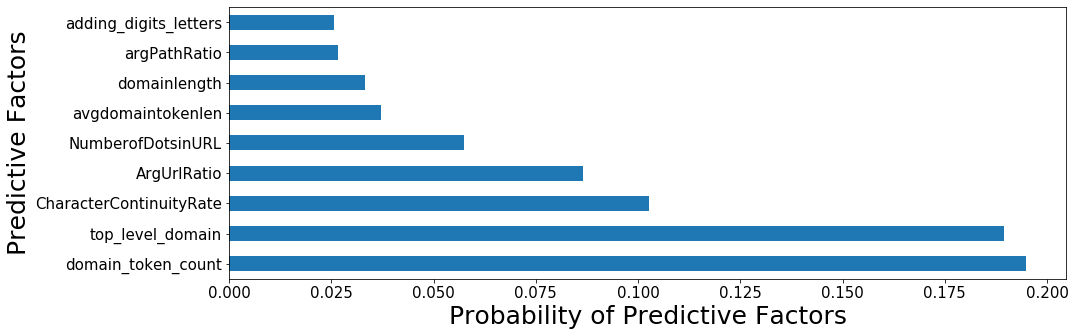

In [52]:
# Feature selection 
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
model.fit(x,y)
# Extract best 10 features from all 79 features
fig, ax = plt.subplots(figsize=(15, 5))
feature_imp= pd.Series(model.feature_importances_,index=x.columns)
feature_imp.nlargest(9).plot(kind='barh')
plt.xlabel("Probability of Predictive Factors", fontsize=25)
plt.ylabel("Predictive Factors", fontsize= 25)
# plt.title("Feature selection for spam", fontsize=30)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [25]:
# As everytime features are changing on every run 
# Stroring feeatures in ts variable.
ts = (feature_imp.nlargest(10).to_dict())
ts = ts.keys()

In [26]:
# Final columns for training and testing for model
columns_to_keep = x[ts]
from sklearn.model_selection import train_test_split
# TODO: What is random state and how it's value is chosen?
features_train,features_test,y_train,y_test = train_test_split(columns_to_keep,y,test_size=0.3,random_state=66)
from sklearn.ensemble import RandomForestClassifier
# Intiate the model
rfc = RandomForestClassifier()
rfc.fit(features_train,y_train)
score = rfc.score(features_test, y_test)

/Users/yashchoksi/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [27]:
score

0.9974677716390423

In [11]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

In [14]:
predicted_data = rfc.predict(features_test)

In [25]:
# Supply actual data and predcited data.
def confusion(actual, predicted):
    print("Confusion matrix: \n", confusion_matrix(actual, predicted))
    print("Precision Score: ", precision_score(actual, predicted, pos_label='spam'))
    print("Recall score: ", recall_score(actual, predicted, pos_label='spam'))
    print("Accuracy of our prediction: ", accuracy_score(actual, predicted))

In [26]:
confusion(y_test, predicted_data)

Confusion matrix: 
 [[2392    2]
 [   3 1947]]
Precision Score:  0.9989738327347357
Recall score:  0.9984615384615385
Accuracy of our prediction:  0.9988489871086557


In [ ]:
['SymbolCount_Domain', 'tld', 'NumberofDotsinURL', 'NumberRate_AfterPath', 'domainlength', 'Entropy_Afterpath', 'SymbolCount_URL', 'ArgUrlRatio', 'CharacterContinuityRate']